In [1]:
import ase.io
import matplotlib.pyplot as plt
import numpy as np

from quippy.potential import Potential

import womblepy
from scipy.signal import argrelextrema

from ase.optimize.fire import FIRE

from ase.constraints import FixAtoms
from ase.neb import SingleCalculatorNEB

In [2]:
# settings
gap_path = "/home/tks32/work/oxidation_gap/fitting_iterations/iter_7.0_collide/gap_model/GAP.xml"
e0_byhand = {'H': -12.336810713133827,
             'C': -145.60813964301911,
             'O': -429.04802314923108}
pot = Potential("", param_filename=gap_path)

In [3]:
# helpers

def makefig():
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(10)
    return fig, fig.add_subplot()

def opt_frame(atoms, **kwargs):
    local_at = atoms.copy()
    local_at.set_calculator(pot)
    opt = FIRE(local_at)
    opt.run(**kwargs)
    return local_at

def neb_worker(given_images, fn, interpolate=False, **kwargs):
    neb = SingleCalculatorNEB(given_images)
    if interpolate:
        neb.interpolate()
    opt_neb = FIRE(neb)
    opt_neb.run(**kwargs)
    ase.io.write(fn, given_images)
    
def plot_neb_ener(local_images):
    ener = womblepy.testing.extract_energies(local_images, e0=e0_byhand)
    extrema = np.concatenate([argrelextrema(ener, np.greater)[0],
                         argrelextrema(ener, np.less)[0], [0, len(local_images)-1]])
    x = np.arange(len(ener))
    
    # fig and plot
    fig, ax = makefig()
    ax.plot(x, ener, marker="+", markersize=20, linestyle="--")
    ax.scatter(x[extrema], ener[extrema], c="tab:orange")
    
    for i in extrema:
        ax.text(x[i] + 0.01, ener[i] + 0.01, i, fontsize=15, c="tab:orange")
        
def refine_path(orig_images, indices, new_start=None, new_end=None):
    if new_end is None and new_start is None:
        raise ValueError
        
    images = []
    if new_start is not None:
        images.append(new_start.copy())
    else:
        images.append(orig_images[indices[0]].copy())
    
    for i in range(indices[0] + 1, indices[1] - 1):
        images.append(orig_images[i].copy())
        images.append(orig_images[i].copy())
        
    if new_end is not None:
        images.append(new_end.copy())
    else:
        images.append(orig_images[indices[1]].copy())
        
    for frame in images:
#         pos = frame.get_positions()
#         frame.positions -= frame.get_positions()[0]
        frame.set_constraint(FixAtoms(indices=[0]))
        frame.set_calculator(pot)
    
    return images

In [4]:
traj = ase.io.read("traj_0.xyz", ":")
ener = womblepy.testing.extract_energies(traj, e0=e0_byhand)
extrema = argrelextrema(ener, np.less)[0]
x = np.arange(len(ener))
np.shape(extrema)

(15,)

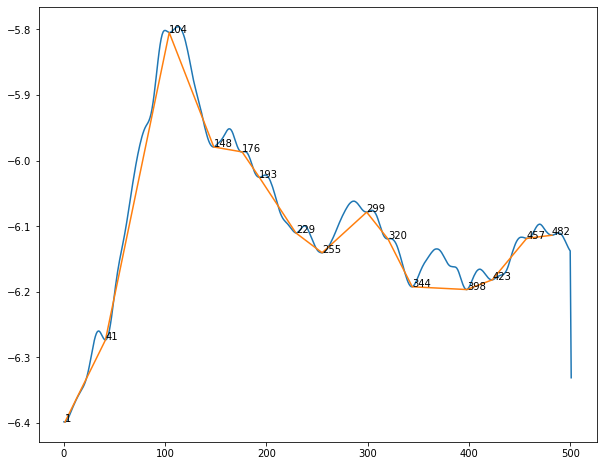

In [5]:
fig, ax = makefig()
ax.plot(x, ener)
ax.plot(x[extrema], ener[extrema])

for i in extrema:
    ax.text(x[i], ener[i], i)

In [6]:
#----------------------------------------------------
# setup
id_start = 0
id_end = 255
n_images = 20
#----------------------------------------------------

In [7]:
# start
start = opt_frame(traj[id_start], fmax=0.1)

      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 11:40:27    -1401.849857*       1.5182
FIRE:    1 11:40:27    -1401.887535*       0.6158
FIRE:    2 11:40:27    -1401.903161*       1.4849
FIRE:    3 11:40:27    -1401.915076*       0.8817
FIRE:    4 11:40:27    -1401.925018*       0.5334
FIRE:    5 11:40:27    -1401.927640*       0.7514
FIRE:    6 11:40:27    -1401.928685*       0.6987
FIRE:    7 11:40:27    -1401.930600*       0.5951
FIRE:    8 11:40:28    -1401.933076*       0.5164
FIRE:    9 11:40:28    -1401.935762*       0.5129
FIRE:   10 11:40:28    -1401.938395*       0.5087
FIRE:   11 11:40:28    -1401.940922*       0.5043
FIRE:   12 11:40:28    -1401.943546*       0.4997
FIRE:   13 11:40:28    -1401.946942*       0.4947
FIRE:   14 11:40:28    -1401.951609*       0.4892
FIRE:   15 11:40:28    -1401.957804*       0.4828
FIRE:   16 11:40:28    -1401.965344*       0.4759
FIRE:   17 11:40:28    -1401.973991*       0.5395
FI

In [8]:
# start
end = opt_frame(traj[id_end], fmax=0.1)

      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 11:40:31    -1399.531480*       2.5942
FIRE:    1 11:40:31    -1399.649839*       1.5159
FIRE:    2 11:40:31    -1399.754109*       2.4275
FIRE:    3 11:40:31    -1399.828743*       2.5594
FIRE:    4 11:40:31    -1399.860837*       1.6376
FIRE:    5 11:40:31    -1399.882387*       0.8644
FIRE:    6 11:40:31    -1399.883851*       0.8387
FIRE:    7 11:40:31    -1399.886522*       0.7922
FIRE:    8 11:40:31    -1399.890025*       0.7339
FIRE:    9 11:40:32    -1399.894078*       0.6741
FIRE:   10 11:40:32    -1399.898638*       0.6206
FIRE:   11 11:40:32    -1399.903855*       0.5760
FIRE:   12 11:40:32    -1399.909891*       0.5379
FIRE:   13 11:40:32    -1399.917519*       0.5004
FIRE:   14 11:40:32    -1399.926818*       0.5108
FIRE:   15 11:40:32    -1399.937795*       0.5347
FIRE:   16 11:40:32    -1399.950842*       0.5444
FIRE:   17 11:40:32    -1399.966729*       0.5373
FI

In [9]:
# write them out to see for sure
ase.io.write("endpoints.xyz", [start, end])

/home/tks32/programs/miniconda3/envs/quip_env/lib/python3.7/site-packages/ase/io/extxyz.py:843: UserWarning: write_xyz() overwriting array "forces" present in atoms.arrays with stored results from calculator
  'from calculator'.format(key))


In [10]:
# equally spaced images
images = [start]
for i in range(1, n_images - 1):
    index = int(np.floor(i * (id_end - id_start) / (n_images - 1)))
#     print(index)
    images.append(traj[index].copy())
images += [end]


# move to zero
for frame in images:
    pos = frame.get_positions()
    frame.positions -= frame.get_positions()[0]
    frame.set_constraint(FixAtoms(indices=[0]))
    frame.set_calculator(pot)

ase.io.write("starting_images.xyz", images)

In [11]:
neb_worker(images, "step0_30.xyz", steps=30)

      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 11:40:36    -1396.490383*       8.6049
FIRE:    1 11:40:36    -1396.927990*       5.5205
FIRE:    2 11:40:37    -1397.206418*       3.4937
FIRE:    3 11:40:38    -1397.418645*       3.3743
FIRE:    4 11:40:39    -1397.629435*       3.9037
FIRE:    5 11:40:39    -1397.837116*       3.5833
FIRE:    6 11:40:40    -1398.033981*       3.1427
FIRE:    7 11:40:40    -1398.221582*       4.6505
FIRE:    8 11:40:41    -1398.401892*       2.5189
FIRE:    9 11:40:41    -1398.596057*       2.2964
FIRE:   10 11:40:42    -1398.800328*       3.0269
FIRE:   11 11:40:42    -1398.983348*       2.5473
FIRE:   12 11:40:43    -1399.118644*       2.3876
FIRE:   13 11:40:43    -1399.202626*       3.2012
FIRE:   14 11:40:44    -1399.267278*       2.2954
FIRE:   15 11:40:44    -1399.319505*       1.9208
FIRE:   16 11:40:45    -1399.362566*       2.2930
FIRE:   17 11:40:45    -1399.381491*       1.6591
FI

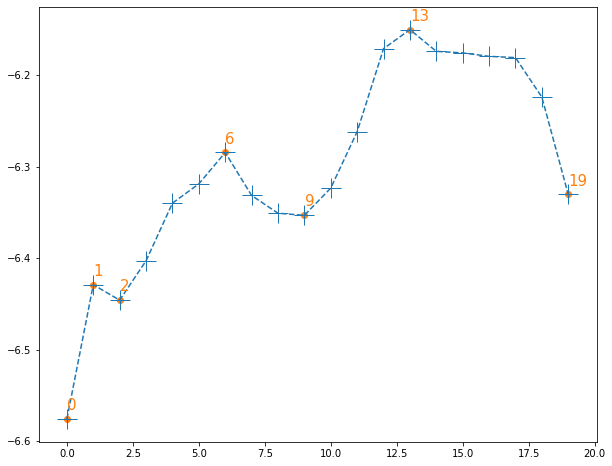

In [12]:
plot_neb_ener(images)

In [13]:
opt_9 = opt_frame(images[9], steps=40)
ase.io.write("intermediate_9.xyz", opt_9)

      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 11:40:53    -1401.447017*       0.9336
FIRE:    1 11:40:53    -1401.469242*       0.8490
FIRE:    2 11:40:53    -1401.501758*       0.7871
FIRE:    3 11:40:53    -1401.547568*       0.6698
FIRE:    4 11:40:53    -1401.597595*       0.5933
FIRE:    5 11:40:53    -1401.652751*       0.5382
FIRE:    6 11:40:53    -1401.705380*       0.4614
FIRE:    7 11:40:53    -1401.746164*       0.4659
FIRE:    8 11:40:53    -1401.771097*       0.2580
FIRE:    9 11:40:53    -1401.771843*       0.4190
FIRE:   10 11:40:53    -1401.773299*       0.4072
FIRE:   11 11:40:53    -1401.775593*       0.3845
FIRE:   12 11:40:53    -1401.778252*       0.3516
FIRE:   13 11:40:53    -1401.781247*       0.3086
FIRE:   14 11:40:53    -1401.784522*       0.2583
FIRE:   15 11:40:53    -1401.787795*       0.2049
FIRE:   16 11:40:53    -1401.790791*       0.1485
FIRE:   17 11:40:54    -1401.793655*       0.1583
FI

/home/tks32/programs/miniconda3/envs/quip_env/lib/python3.7/site-packages/ase/io/extxyz.py:843: UserWarning: write_xyz() overwriting array "forces" present in atoms.arrays with stored results from calculator
  'from calculator'.format(key))


In [15]:
im_par0 = refine_path(images, [0, 9], new_end=opt_9)
neb_worker(im_par0, "step1_30.xyz", interpolate=True, steps=30)

      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 11:40:56    -1401.651923*       6.2747
FIRE:    1 11:40:56    -1401.934785*       1.8336
FIRE:    2 11:40:57    -1401.955770*       2.6905
FIRE:    3 11:40:57    -1401.958944*       2.4150
FIRE:    4 11:40:58    -1401.962994*       1.8680
FIRE:    5 11:40:59    -1401.965722*       1.0509
FIRE:    6 11:40:59    -1401.967891*       1.1902
FIRE:    7 11:41:00    -1401.968307*       1.1500
FIRE:    8 11:41:00    -1401.969042*       1.0742
FIRE:    9 11:41:01    -1401.969942*       0.9769
FIRE:   10 11:41:02    -1401.970852*       0.8699
FIRE:   11 11:41:02    -1401.971682*       0.7605
FIRE:   12 11:41:02    -1401.972443*       0.6632
FIRE:   13 11:41:03    -1401.973228*       0.6759
FIRE:   14 11:41:04    -1401.974237*       0.7177
FIRE:   15 11:41:04    -1401.975567*       0.7370
FIRE:   16 11:41:04    -1401.977208*       0.6989
FIRE:   17 11:41:05    -1401.979025*       0.6039
FI

In [16]:
im_par1 = refine_path(images, [9, 19], new_start=opt_9)
neb_worker(im_par1, "step2_30.xyz", interpolate=True, steps=30)

      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 11:41:11    -1395.211714*      27.0711
FIRE:    1 11:41:12    -1396.794250*      15.3936
FIRE:    2 11:41:12    -1397.988164*      11.1210
FIRE:    3 11:41:13    -1398.656759*       9.1651
FIRE:    4 11:41:13    -1398.968903*       6.9387
FIRE:    5 11:41:14    -1399.039640*       3.9624
FIRE:    6 11:41:14    -1399.043448*       5.1359
FIRE:    7 11:41:15    -1399.180966*       3.9493
FIRE:    8 11:41:15    -1399.358824*       2.7802
FIRE:    9 11:41:16    -1399.458801*       2.6727
FIRE:   10 11:41:16    -1399.460563*       3.5773
FIRE:   11 11:41:17    -1399.468563*       4.2665
FIRE:   12 11:41:17    -1399.556720*       4.6417
FIRE:   13 11:41:18    -1399.676127*       5.4570
FIRE:   14 11:41:18    -1399.754406*       4.8577
FIRE:   15 11:41:19    -1399.776489*       3.5183
FIRE:   16 11:41:19    -1399.789498*       3.2439
FIRE:   17 11:41:20    -1399.812246*       2.7285
FI

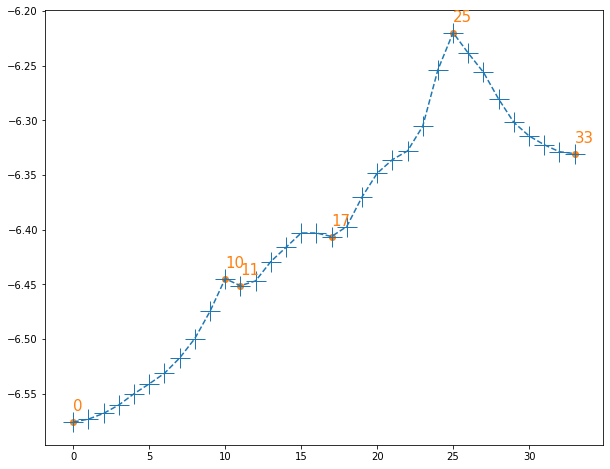

In [17]:
plot_neb_ener(im_par0 + im_par1)

In [19]:
#-----------------------------------
# which ones to calculate with CP2K
dft_indices = [0, 10, 17, 25, 33]
#-----------------------------------

ase.io.write("for_dft.xyz", [at for i, at in enumerate(im_par0+im_par1) if i in dft_indices])